# <font color=black>Aprendizagem Supervisionada em Machine Learning (Regressão) <br> Previsão da diferença de golos em jogos de futebol </font> 


### <font color=black>Trabalho realizado por: </font> 

- Bernardo Costa Moreira - up201604014
- Filipe Carlos de Almeida Duarte da Cunha Nogueira - up201604129
- Francisco Jorge de Almeida Henriques Pereira - up201605306


## <font color=black>Introdução</font> 

Este trabalho tem como finalidade aplicar os conceitos dados nas aulas teóricas e práticas sobre a aprendizagem supervisionada, mais especificamente regressão, sobre os dados fornecidos pelo Kaggle (European Soccer Database). No fim, os algoritmos usados deveriam fornecer uma previsão da diferença de golos resultante de cada jogo.<br>
<br>
European Soccer Database fornecida pelo Kaggle é uma base de dados que contém toda a informação sobre os jogadores, equipas, jogos, etc, utilizada neste trabalho. Estes dados foram gerados a partir de situações reais e são recolhidos anualmente.<br>
<br>
Devido ao grande volume de dados, esta tarefa torna-se perfeita para a aplicação de técnicas de Machine Learning. Os algoritmos de Machine Learning, a partir de inputs amostrais, funcionam através da construção de um modelo que é utilizado para fazer previsões ou decisões de acordo com os dados fornecidos. Deste modo, neste trabalho iremos utilizar algoritmos de aprendizagem supervisionada, nomeadamente Árvores de Decisão, Redes Neuronais e Suporte de Máquinas Vetoriais, para resolver o problema do tipo regressão mencionado anteriormente.

## <font color=black>Descrição da Base de Dados e do Problema</font> 

A base de dados fornecida contém informação sobre jogos de futebol ao longo do período de 2008 a 2016. Está incluído conteúdo respetivo a mais de 11 ligas e respectivas equipas, dados sobre mais de 10000 jogadores e mais de 25000 partidas. É possível ainda encontrar informação de odds relativo a cada partida, nomeadamente odds da vitória da equipa de casa, empate ou vitória da equipa de fora.<br>
<br>
É possível encontrar no site onde a base de dados é disponibilizada (Kaggle), um aviso quanto à falta de informação associada a algumas partidas, aspeto a ter em conta posteriormente no pré-processamento de dados. <br>
<br>
A informação está distribuída por várias tabelas, sendo estas:<br>
*Nota: é possível notar nos atributos de alguma tabelas a terminação _api_id  que contém “foreign keys” das fontes originais de dados. <br>
   - Country
        - id (identificador do país)
        - name (nome do país)
        
   - League:
        - id (identificador da liga)
        - country_id (relativo ao país em que a liga está inserida - Tabela Country)
        - name (nome da liga)
        
   - Match
        - id (identificador match)
        - country_id (relativo ao país em que a liga está inserida - Tabela Country)
        - league_id (relativo à liga em que está inserida - Tabela Country)
        - season (temporada)
        - stage (jornada)
        - date (data do jogo)
        - match_api_id (identificador da partida)
        - home_team_api_id (identificador da equipa da casa)
        - away_team_api_id (identificador da equipa de fora)
        - home_team_goal (golos da equipa da casa)
        - away_team_goal (golos da equipa de fora)
        - (home/away)_player_(Xn/Yn) (posições dos jogadores no alinhamento)
        - (home/away)_player_(n) (identificador dos jogadores que jogaram a partida - player_api_id)
        - goal/shot_on/shot_off/foul_commit/card/cross/corner/possession (detalhes após jogo)
        - (gambling_house_name)H (odds da vitória para a equipa da casa)
        - (gambling_house_name)D (odds para empate)
        - (gambling_house_name)A (odds da vitória para a equipa de fora)   
        
   - Player
        - id (identificador do jogador nesta tabela)
        - player_api_id (identificador do jogador)
        - player_name (nome do jogador)
        - player_fifa_api_id (identificador do jogador nos dados do FIFA)
        - birthday (aniversário)
        - height (altura)
        - weight (peso)

   - Player_Attributes
        - id (identificador do jogador nesta tabela)
        - player_fifa_api_id (identificador do jogador nos dados do FIFA)
        - player_api_id (identificador do jogador)
        - date (data de registo das informações do tuplo ao qual este atributo pertence)
        - overall_rating (rating geral do jogador )
        - potential (potêncial)
        - preferred_foot (pé de preferência do jogador)
        - attacking_work_rate (taxa de ofensiva do jogador)
        - defensive_work_rate (taxa defensiva do jogador)
        - crossing (habilidade de cruzamento)
        
   - Team
        - id (identificador da equipa nesta tabela)
        - team_api_id (identificador da equipa)
        - team_fifa_api_id (identificador da equipa do FIFA)
        - team_long_name (nome completo da equipa)
        - team_short_name (abreviatura do nome da equipa)
    
   - Team_Attributes
        - id (identificador da equipa nesta tabela)
        - team_fifa_api_id (identificador da equipa do FIFA)
        - team_api_id (identificador da equipa)
        - date (data de registo das informações do tuplo ao qual este atributo pertence)
        - buildUpPlaySpeed (velocidade de construção de jogadas da equipa)
        - buildUpPlaySpeedClass (velocidade classificativa de construção de jogadas da equipa)
        - buildUpPlayDribbling (capacidade de drible da equipa)
        - buildUpPlayDribblingClass (capacidade classificativa de drible da equipa)
        - buildUpPlayPassing (efetividade dos passes da equipa)
        - buildUpPlayPassingClass (efetividade classificativa dos passes da equipa)
            
<br>O objetivo do nosso trabalho passaria por estimar a diferença de golos para cada partida, calculado da seguinte forma (a diferença pode ser negativa significando vitória da equipa de fora):<br> 
<br>&emsp;&emsp;&emsp;  $ dif_{golos}=golos_{casa} - golos_{fora} $ <br>     
A base de dados possui um extenso set de informação, no entanto, nem todo o conteúdo é relevante para a nossa análise. Para tal, passaremos à explicação das técnicas e métodos utilizados para a seleção de dados.



## <font color=black>Abordagem e Pré-Processamento de Dados</font> 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read all files 
country = pd.read_csv('Country_Original.csv')
league = pd.read_csv('League_Original.csv')
match = pd.read_csv('Match_Original.csv')
player = pd.read_csv('Player_Original.csv')
player_attributes = pd.read_csv('Player_Attributes_Original.csv')
team = pd.read_csv('Team_Original.csv')
team_attributes = pd.read_csv('Team_Attributes_Original.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### <font color=black>Organização e Limpeza de Dados</font> 

Pretendemos nesta secção do trabalho reduzir e tratar os dados de forma a que não exista informação irrelevante para o modelo que pretendemos construir.

### <font color=black> - Eliminação de Valores Nulos</font>
De forma a termos uma base de dados organizada e sem ruído, decidimos realizar várias alterações e tratamentos à base de dados fornecida.
Começamos por remover os atributos que consideramos que não acrescentariam valor ao nosso algoritmo.

In [3]:
# Eliminar atributos relativos à posição dos jogadores
player_attributes.drop(player_attributes.columns.to_series()["potential":], axis=1, inplace = True)


Neste caso escolhemos **remover os valores duplicados**, caso estes existam

In [4]:
# Eliminar duplicados caso existam
player_attributes.drop_duplicates(keep = False, inplace = True)

Dado que consideramos o atributo *overall_rating* bastante importante na avaliação do jogador, caso este atributo seja nulo,
deverá ser removido.

In [5]:
# Verficar se existe overall_ratings null
player_attributes.dropna(axis=0, how="any", subset =['overall_rating'], inplace=True)
player_attributes['overall_rating'].isnull().sum()

0

Por forma a organizar e limpar os dados, decidimos, uma vez mais, remover colunas que na nossa opinião não seriam fulcrais para o desenvolvimento deste projeto, dando assim preferência a um conjunto de dados bem organizado


In [6]:
# Eliminar atributos relativos à posição dos jogadores
match.drop(match.columns.to_series()["home_player_X1":"away_player_Y11"], axis=1, inplace = True)
# Eliminar os seguintes atributos -> shoton, shotoff, foulcommit, card, cross, corner, possession
match.drop(match.columns.to_series()["goal":"possession"], axis=1,inplace = True)

In [7]:
#Organizar dados por datas, do passado para o presente
match['date'] = match['date'].astype('datetime64[ns]')
match = match.sort_values(by=['date'], ascending=True)

Todas as linhas que **não tiverem informação sobre jogadores** são consideradas *lixo ou ruido* e consequentemente são removidas

In [8]:
#Eliminar todos as linhas que não tenham nenhuma info sobre os jogadores
match = match.dropna(axis=0, how="all", subset=match.columns.to_series()["home_player_1":"away_player_11"])

In [9]:
#Eliminar todas as linhas que não tenham nenhuma odd relativa ao jogo
match.dropna(axis=0, how="all", subset=match.columns.to_series()["B365H":], inplace=True)

 Foi definido um limite minimo de **8 Jogadores**, isto é, caso alguma linha contenha informação sobre menos de 8 jogadores, esta será imediatamente removida

In [10]:
#Eliminar partidas em que não são conhecidos pelo menos 8 jogadores que jogaram (para a Equipa da Casa)
match = match.dropna(axis=0, thresh=8, subset=match.columns.to_series()["home_player_1":"home_player_11"])
#Verificação
match.loc[match.loc[:,'home_player_1':'home_player_11'].count(axis=1) < 8]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA


In [11]:
#Eliminar partidas em que não são conhecidos pelo menos 8 jogadores que jogaram (para a Equipa de Fora)
match = match.dropna(axis=0, thresh=8, subset=match.columns.to_series()["away_player_1":"away_player_11"])
#Verificação
match.loc[match.loc[:,'away_player_1':'away_player_11'].count(axis=1) < 8]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA


### <font color=black> - Substituição de Valores Nulos </font>

Incrementalmente fomos realizando **merges** de tabelas, por forma a juntar toda a informação de todas as tabelas, de uma forma organizada, em apenas um data set. 

Desta forma, quando analisamos um *match* somos capazes de ver os atributos dos jogadores envolvidos neste jogo, em vez de apenas vermos os seus id’s. Após efetuar estes merges, tratamos de remover ou, como nem todos os valores nulos necessitam de ser removidos, prosseguimos e estimamos alguns destes valores.

In [12]:
#Passar o formato dos atributos 'date' para formato de tempo
match['date'] = match['date'].astype('datetime64[ns]') 
player_attributes['date'] = player_attributes['date'].astype('datetime64[ns]') 
team_attributes['date'] = team_attributes['date'].astype('datetime64[ns]') 

In [13]:
#Create copy of the match and player dataframe
match_copy = match.copy()
player_copy = player.copy()
player_height = player_copy[["player_api_id", "height","weight"]].copy()

Merge para fazer com o que nosso data_set passe a ter informações sobre os jogadores, utilizando os id's destes.
Neste caso, estando-se a tratar da altura e do peso de cada jogador, fomos individualmente buscar o atributo do jogador para no fim serem criadas duas novas colunas para cada equipa *Média do peso*, *Média da altura*

In [14]:
# Merge das alturas e pesos para casa jogador em específico - Casa
for i in range(1,12):
    match_copy = match_copy.merge(player_height, how='left', left_on=['home_player_'+'%s'%i], right_on=['player_api_id'], suffixes=('', '_home_'+'%s'%i), validate="m:1") 

In [15]:
# Eliminar as colunas do player_api_id e o mudar o nome de height para height_home_1
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='player_api_id')))]
match_copy.rename(columns={"height": "height_home_1"}, inplace=True)
match_copy.rename(columns={"weight": "weight_home_1"}, inplace=True)

In [16]:
# Fazer média das altura e pesos
match_copy['mean_height_home']= match_copy[list(match_copy.filter(regex='height_home'))].mean(axis=1)
match_copy['mean_weight_home']= match_copy[list(match_copy.filter(regex='weight_home'))].mean(axis=1)

In [17]:
# Merge das alturas e pesos para casa jogador em específico - Fora
for i in range(1,12):
    match_copy = match_copy.merge(player_height, how='left', left_on=['away_player_'+'%s'%i], right_on=['player_api_id'], suffixes=('', '_away_'+'%s'%i), validate="m:1") 

In [18]:
# Eliminar as colunas do player_api_id e o mudar o nome de height para height_away_1
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='player_api_id')))]
match_copy.rename(columns={"height": "height_away_1"}, inplace=True)
match_copy.rename(columns={"weight": "weight_away_1"}, inplace=True)

In [19]:
# Fazer média das altura e pesos
match_copy['mean_height_away']= match_copy[list(match_copy.filter(regex='height_away'))].mean(axis=1)
match_copy['mean_weight_away']= match_copy[list(match_copy.filter(regex='weight_away'))].mean(axis=1)

Uma vez criadas as novas colunas, prosseguimos para a eliminação das colunas que apenas serviram de auxilio para calcular os valores utilizados nestas mesmas colunas novas.

In [20]:
# Eliminar colunas com alturas e pesos dos jogadores 
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='height_home_')))]
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='height_away_')))]
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='weight_home_')))]
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='weight_away_')))]

No que diz respeito às **odds** disponíveis para cada jogo, concluimos que a melhor abordagem possível seria realizar uma média das odds disponíveis para todas as possibilidades. 
Isto é, realizamos uma média das odds que todos os sites disponibilizaram para a possibilidade da **equipa da casa ganhar, para o empate e para a equipa de fora ganhar**, ficando assim com apenas 3 colunas e permitindo também trocar os valores nulos existentes pela média calculada.

In [21]:
#Criar Listas com os labbels das odds para Home, Draw, Away
home_ods = [a for a in match_copy.columns if a.endswith('H')]
draw_ods = [b for b in match_copy.columns if b.endswith('D')]
away_ods = [c for c in match_copy.columns if c.endswith('A')]

In [22]:
# Fazer média das odds
match_copy['mean_ods_home'] = match_copy[home_ods].mean(axis=1)
match_copy['mean_ods_draw'] = match_copy[draw_ods].mean(axis=1)
match_copy['mean_ods_away'] = match_copy[away_ods].mean(axis=1)

In [23]:
#Retirar colunas das ods
odds_indices_drop = ['B365H','B365D','B365A','BWH','BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','SJH','SJD','SJA','VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA']
match_copy.drop(columns=odds_indices_drop, inplace=True)

Um dos atributos essenciais é também o **Overall** de cada jogador.

Para cada jogador alinhado na equipa fomos pesquisar o seu *overall_rating*. É de notar que esta pesquisa foi baseada na data mais recente da sua atualização, visto que varios jogadores teriam varias linhas de atributos, em datas diferentes.

Fizemos então merge com o nosso dataset, e demos lugar à criação de colunas auxiliares que continham os valores destes overalls. 

Depois de calculada a media do *overall_rating* da equipa, criamos então a coluna **mean_or_home** e **mean_or_away** e procedemos para a eliminação das colunas auxiliares utilizadas.

In [24]:
# Ir buscar os overall_ratings para cada jogador a jogar a partida - Casa
player_ratings = player_attributes[["player_api_id", "date","overall_rating"]].copy()
for i in range(1,12):
    match_copy = match_copy.merge(player_ratings, how='outer', left_on=['home_player_'+'%s'%i], right_on=['player_api_id'], suffixes=('', '_home'), validate="m:m")
    index_to_drop1 = match_copy[ (match_copy['date_home'] > match_copy['date'])].index
    match_copy.drop(index_to_drop1 , inplace=True)
    match_copy.drop_duplicates(subset= ['id'], keep='first', inplace=True) 
    match_copy.rename(columns={"overall_rating": "or_home_player_"+'%s'%i}, inplace=True)
    match_copy.drop(columns=['player_api_id','date_home'] , inplace=True)

In [25]:
# Ir buscar os overall_ratings para cada jogador a jogar a partida - Fora
for i in range(1,12):
    match_copy = match_copy.merge(player_ratings, how='outer', left_on=['away_player_'+'%s'%i], right_on=['player_api_id'], suffixes=('', '_away'), validate="m:m")
    index_to_drop1 = match_copy[ (match_copy['date_away'] > match_copy['date'])].index
    match_copy.drop(index_to_drop1 , inplace=True)
    match_copy.drop_duplicates(subset= ['id'], keep='first', inplace=True) 
    match_copy.rename(columns={"overall_rating": "or_away_player_"+'%s'%i}, inplace=True)
    match_copy.drop(columns=['player_api_id','date_away'] , inplace=True)

In [26]:
# Criar média dos Overall Ratings da equipa da casa e fora, assim como eliminar os valores associados aos jogador dado que
# agora só nos interessa a média

match_copy['mean_or_home']= match_copy[list(match_copy.filter(regex='or_home_player'))].mean(axis=1)
match_copy['mean_or_away']= match_copy[list(match_copy.filter(regex='or_away_player'))].mean(axis=1)
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='or_away_player_')))]
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='or_home_player_')))]
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='home_player')))]
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='away_player')))]

In [27]:
#Eliminar valores adicionados ao match devido ao outter join e que não fazem sentido
match_copy = match_copy.dropna(axis=0, subset=['id'])

No que diz respeito à analise do resultado, decidimos remover as duas colunas com os golos de cada equipa e criar uma apenas **dif_goals** que representa a diferença de golos:
* \> 0Equipa da casa ganha

* = 0 Empate

* < 0 Equipa de fora ganha

In [28]:
# Cálculo da diferença de golos 
match_copy["dif_goals"] = match_copy.home_team_goal - match_copy.away_team_goal
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='home_team_goal')))]
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='away_team_goal')))]


In [29]:
match_copy = match_copy[match_copy.columns.drop(list(match_copy.filter(regex='country_id')))]

In [30]:
team_attributes_copy = team_attributes.copy()

In [31]:
colToDrop = [d for d in team_attributes_copy.columns if d.endswith('Class')]
team_attributes_copy.drop(columns=colToDrop, inplace=True)

Nesta classe *Team Attributes*, decidimos agrupar os valores disponíveis de *buildUp*, *chance..* e *defence..* em 3 propriedades : *offense_team_rates*, *center_team_rates*, *defense_team_rates*.

Esta geração foi feita utilizando a média dos valores anteriormente referidos e, caso dois ou mais forem valores inválidos, esta linha de dados será então removida pois, uma vez mais, consideramos que os dados não são suficientes para definir uma equipa.


In [32]:
# Verificação de que existem pelo menos dois parametros para avaliar a equipa
team_attributes_copy = team_attributes_copy.dropna(axis=0, thresh=2, subset=["buildUpPlaySpeed", "buildUpPlayDribbling" ,"buildUpPlayPassing"])
team_attributes_copy = team_attributes_copy.dropna(axis=0, thresh=2, subset=["chanceCreationPassing","chanceCreationCrossing","chanceCreationShooting"])
team_attributes_copy = team_attributes_copy.dropna(axis=0, thresh=2, subset=["defencePressure","defenceAggression","defenceTeamWidth"])

In [33]:
#Divide os atributos das equipas em 3 categorias : Atacante, medio e defesa
team_attributes_copy["offense_team_rates"] = team_attributes_copy[list(team_attributes_copy.filter(regex='buildUp'))].mean(axis=1)
team_attributes_copy["center_team_rates"] = team_attributes_copy[list(team_attributes_copy.filter(regex='chanceCreation'))].mean(axis=1)
team_attributes_copy["defense_team_rates"] = team_attributes_copy[list(team_attributes_copy.filter(regex='defence'))].mean(axis=1)

In [34]:
#Elimina as colunas que não vão ser utilizadas. Uma vez que as colunas novas já se encontram na tabela
team_attributes_copy = team_attributes_copy[team_attributes_copy.columns.drop(list(team_attributes_copy.filter(regex='buildUp')))]
team_attributes_copy = team_attributes_copy[team_attributes_copy.columns.drop(list(team_attributes_copy.filter(regex='chanceCreation')))]
team_attributes_copy = team_attributes_copy[team_attributes_copy.columns.drop(list(team_attributes_copy.filter(regex='defence')))]


In [35]:
#Definir as rates a inserir na tabela principal
team_ratings = team_attributes_copy[["team_api_id" ,  "date", "offense_team_rates" , "center_team_rates", "defense_team_rates"]]

In [36]:
match_copy.isnull().sum()

id                  0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
mean_height_home    0
mean_weight_home    0
mean_height_away    0
mean_weight_away    0
mean_ods_home       0
mean_ods_draw       0
mean_ods_away       0
mean_or_home        0
mean_or_away        0
dif_goals           0
dtype: int64

In [37]:
#Merge para a tabela principal dos ratings da equipa da casa
match_copy = match_copy.merge(team_ratings, how='outer', left_on=["home_team_api_id"], right_on=['team_api_id'], suffixes=('', '_home'), validate="m:m")

In [38]:
#Tratar o merge da equipa da casa
index_to_drop1 = match_copy[ (match_copy['date_home'] > match_copy['date'])].index
match_copy.drop(index_to_drop1 , inplace=True)
match_copy.drop_duplicates(subset= ['id'], keep='last', inplace=True) 
match_copy.rename(columns={"offense_team_rates": "offense_team_rates_home", "center_team_rates" : "center_team_rates_home", "defense_team_rates":"defense_team_rates_home"}, inplace=True)
match_copy.drop(columns=['date_home', 'team_api_id'] , inplace=True)

In [39]:
#Eliminar valores adicionados ao match devido ao outter join e que não fazem sentido
match_copy = match_copy.dropna(axis=0, subset=['id'])

In [40]:
match_copy = match_copy.merge(team_ratings, how='outer', left_on=["away_team_api_id"], right_on=['team_api_id'], suffixes=('', '_away'), validate="m:m")

In [41]:
#Tratar o merge da equipa de fora
index_to_drop1 = match_copy[ (match_copy['date_away'] > match_copy['date'])].index
match_copy.drop(index_to_drop1 , inplace=True)
match_copy.drop_duplicates(subset= ['id'], keep='last', inplace=True) 
match_copy.rename(columns={"offense_team_rates": "offense_team_rates_away", "center_team_rates" : "center_team_rates_away", "defense_team_rates":"defense_team_rates_away"}, inplace=True)
match_copy.drop(columns=['date_away', 'team_api_id'] , inplace=True)

In [42]:
#Eliminar valores adicionados ao match devido ao outter join e que não fazem sentido
match_copy = match_copy.dropna(axis=0, subset=['id'])

In [43]:
#match_copy.isnull().sum()
# Se descomentarmos o comando em cima podemos ver que existem dados relativos às equipas. Isto deve-se ao facto de o 
# id destas não estar presenta na base de dados dos Team Attributes. Sendo assim podemos eliminar os valores nulos
match_copy.dropna(inplace=True)

In [44]:
match_copy.shape

(16918, 24)

In [45]:
match_copy = match_copy.round(2)

In [46]:
match_copy.to_csv('pre_processed_df', index=False)

## <font color=black>Modelos de Aprendizagem (Regressão)</font> 

Após o tratamento e pré-processamento de dados, é possivel aplicar os algoritmos de aprendizagem supervisionada sobre os mesmos com o objetivo final de prever a diferença de golos entre duas equipas a jogar uma partida. <br>
Como algoritmos de aprendizagem escolhemos utilizar:
    - Àrvores de decisão
    - Redes Neuronais
    - Máquinas de Suporte Vetorial


Inicialmente é necessário importar um conjunto de bibliotecas que permitem e facilitam o uso destes modelos e fazer a leitura do ficheiro construído no pré-processamento.

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score, max_error, mean_squared_error, r2_score, mean_absolute_error

In [48]:
# ler ficheiro pré-processado 
df = pd.read_csv('pre_processed_df')

Após a leitura do ficheiro é necessário dividir os atributos de entrada e saída. Neste caso possuímos um atributo de saída (diferença de golos, valor a prever), portanto, atribuimos esse mesmo a 'y' e os restantes a 'X'.

In [49]:
#Divisão entre entradas e saída

X = df.drop(['id', 'league_id', 'season', 'stage', 'date','dif_goals'],axis=1)

y = df['dif_goals']

Tendo os dados divididos em entradas e saídas, o próximo passo trata a divisão dos dados num conjunto para treino e num conjunto para teste. Esta divisão é facilitada pela função de 'train_test_split()' disponibilizada pela biblioteca 'scikit-learn'.<br>
<br>O conjunto de treino é responsável pela construção do modelo de aprendizagem. É através deste que o modelo que, iterativamente, são ajustados os seus parâmetros de forma a otimizar o resultado produzido.<br>
O conjunto de teste tem a função de, como o nome indica, avaliar o desempenho do modelo produzido pelo conjunto de treino e verificar se os resultados produzidos coincidem com o resultado verdadeiro. <br>
<br>Dada a importância do treino, optamos por utilizar 85% para o mesmo e os restantes 15% para teste.<br>

<br>É importante ter em conta que os dados apresentam grandezas e escalas diferentes sendo importante a sua normalização de forma a garantir integridade dos mesmos.


In [50]:
# Dividir dados em sets de Treino e Teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15)

# Normalização de Dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### <font color=black> - Árvore de Decisão </font> 

In [51]:
# Treinar o modelo - Árvores de Decisão
tick = time()

rfr = RandomForestRegressor(n_estimators=350)
rfr.fit(X_train, y_train)
prediction_rfr = rfr.predict(X_test)

print("Done in {:.3f}s".format(time() - tick))

Done in 45.370s


In [52]:
# Imprimir métricas para avaliação do desempenho do modelo

print("Explained Variance Score:",explained_variance_score(y_test, prediction_rfr))
print("Max Error:",max_error(y_test, prediction_rfr))
print("R2 Score:",r2_score(y_test, prediction_rfr))
print("Mean Square Error:",mean_squared_error(y_test, prediction_rfr))
print("Mean Absolute Error:",mean_absolute_error(y_test, prediction_rfr))

Explained Variance Score: 0.1671719267304821
Max Error: 8.291428571428572
R2 Score: 0.16608451113361922
Mean Square Error: 2.7955762274649816
Mean Absolute Error: 1.289396600247664


### <font color=black> - Rede Neuronal </font> 

In [53]:
# Treinar o modelo - Rede Neuronal
tick = time()

mlp = make_pipeline(QuantileTransformer(), MLPRegressor(hidden_layer_sizes=(50,50),learning_rate_init=0.01,early_stopping=True))
mlp.fit(X_train, y_train)
prediction_mlp = mlp.predict(X_test)

print("Done in {:.3f}s".format(time() - tick))

Done in 1.737s


In [54]:
# Imprimir métricas para avaliação do desempenho do modelo

print("Explained Variance Score:",explained_variance_score(y_test, prediction_mlp))
print("Max Error:",max_error(y_test, prediction_mlp))
print("R2 Score:",r2_score(y_test, prediction_mlp))
print("Mean Square Error:",mean_squared_error(y_test, prediction_mlp))
print("Mean Absolute Error:",mean_absolute_error(y_test, prediction_mlp))

Explained Variance Score: 0.2032118588723677
Max Error: 8.214954979790777
R2 Score: 0.20024631362268253
Mean Square Error: 2.681053923705395
Mean Absolute Error: 1.2697743553979477


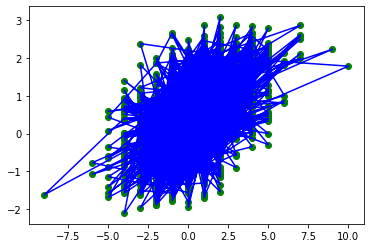

In [55]:
plt.scatter(y_test, prediction_mlp,color='g')
plt.plot(y_test, prediction_mlp,color='b')
plt.show()

### <font color=black> - Máquina de Suporte Vetorial </font> 

In [56]:
# Treinar o modelo - SVR
tick = time()

svr= SVR()
svr.fit(X_train, y_train)
prediction_svr = svr.predict(X_test)

print("Done in {:.3f}s".format(time() - tick))

Done in 8.305s


In [57]:
print("Explained Variance Score:",explained_variance_score(y_test, prediction_svr))
print("Max Error:",max_error(y_test, prediction_svr))
print("R2 Score:",r2_score(y_test, prediction_svr))
print("Mean Square Error:",mean_squared_error(y_test, prediction_svr))
print("Mean Absolute Error:",mean_absolute_error(y_test, prediction_svr))

Explained Variance Score: 0.18871548333752175
Max Error: 8.873126267806157
R2 Score: 0.18867885744987367
Mean Square Error: 2.719832080389962
Mean Absolute Error: 1.272871282125474


## <font color=black>Conclusão</font> 